In [68]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
def distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b) ** 2

In [3]:
def min_dist(a):
    return np.argmin([distance(a, C[i]) for i in range(len(C))])

In [4]:
def assign_clusters(L):
    return np.array([min_dist(x) for x in L])

In [5]:
def get_clusters(arr):
    return [np.where(arr == i)[0] for i in range(len(C))]

In [6]:
def get_means(arr):
    return [np.mean(x[i], axis=0) for i in arr]

In [11]:
def Dk(i):
    return np.sum([distance(x[pair[0]], x[pair[1]]) 
                   for pair in list(itertools.combinations(clusters[i], 2))
                  ]) / len(clusters[i])

In [25]:
def Wk():
    return np.sum([Dk(i) for i in range(len(C))])

In [15]:
def step():
    global C, clusters
    clusters = get_clusters(assign_clusters(x))
    C = get_means(clusters)

In [86]:
X = make_blobs(500, cluster_std=1.3)[0]

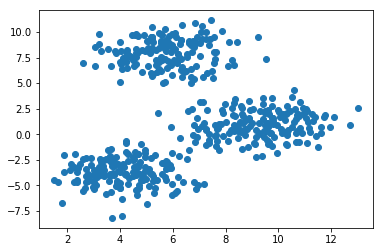

In [87]:
plt.scatter(X.T[0], X.T[1])

## Automate the process and plot elbow curve

In [88]:
dimensions = X.shape[1]

In [110]:
Wks = []
Ewks = []
sds = []
B = 10

for i in range(1, 5):  # up to 4 clusters
    n_clusters = i
    
    # First, run the clustering on actual data
    x = X
    lower_limits = [min(x.T[i]) for i in range(x.shape[1])]
    upper_limits = [max(x.T[i]) for i in range(x.shape[1])]
    
    C = [[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(dimensions)] for _ in range(n_clusters)]
    
    for _ in range(5):  # number of steps
        step()

    Wks.append(np.log(Wk()))
    
    Bwks = []
    # Now, on the null reference data
    for j in range(B):
        # Generate a dataset of 30 samples
        x = np.array([[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(dimensions)] for _ in range(30)])
        
        # Generate initial centers
        C = [[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(dimensions)] for _ in range(n_clusters)]
        # Cluster
        for _ in range(5):
            step()
        print(Wk())
        Bwks.append(np.log(Wk()))
    
    Ewks.append(np.average(Bwks))
    sds.append(np.sqrt(np.var(Bwks)))

1523.0136742846887
1231.305159631373
1261.4471504291485
1049.411083918601
1041.9018845513824
1190.1140311210847
1167.0333996383017
1348.3048670422563
1274.1972820547464
1008.0502438811362
523.9439141453772
652.0327195288188
441.29906070345544
545.9144534128677
417.43096755418316
568.9510110294905
451.3926222173417
612.0592867254007
541.5975551375058
576.8407480142089
322.71623430151146
389.03394853424396
430.7694233279549
389.76881481005705
301.20079001773206
431.8814984740047
491.23884073219875
334.4499852189102
373.9576251112425
379.65500104794245
325.27144273908357
332.4028998602966
311.71657148523394
219.10471250500882
309.626987228546
279.12648379326356
259.63587790661836
252.51276609660187
253.96222524240608
291.98519932549914


In [111]:
Wks

[9.655944874644904, 8.64727864070277, 7.456450877951902, 7.346528698428333]

In [112]:
Ewks

[7.090555172152946, 6.269283408576141, 5.942031835580256, 5.639431590242561]

In [113]:
sds

[0.12096189254741639,
 0.1391162882867689,
 0.14016356655340825,
 0.12693392442317022]

In [114]:
sks = [np.sqrt(1 + 1./B) * i for i in sds]

In [115]:
sks

[0.12686590319513744,
 0.14590639407975284,
 0.1470047887923005,
 0.13312942306798226]

In [116]:
Gaps = [Ewks[i] - Wks[i] for i in range(len(Wks))]

In [117]:
Gaps

[-2.5653897024919576,
 -2.37799523212663,
 -1.514419042371646,
 -1.7070971081857724]

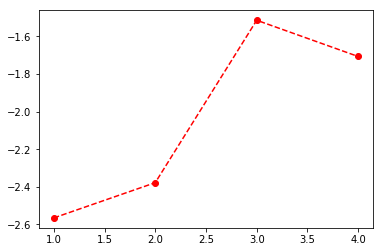

In [118]:
plt.plot(range(1, len(Gaps)+1), Gaps, 'ro--');

In [119]:
for i in range(len(sks)-1):
    print('for k =', i+1, ', Gap(k) >= Gap(k+1) - s(k+1) is', Gaps[i] >= Gaps[i+1] - sks[i+1])

for k = 1 , Gap(k) >= Gap(k+1) - s(k+1) is False
for k = 2 , Gap(k) >= Gap(k+1) - s(k+1) is False
for k = 3 , Gap(k) >= Gap(k+1) - s(k+1) is True
